In [138]:
#Importamos las librerias a usar
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
#leemos los documentos a utilizar que previamente se tranformaron a csv para su facil manejo
df = pd.read_csv('Description-Table 1.csv')
df4 = pd.read_csv('Inflow_Outflow-Table 1.csv')
df3 = pd.read_csv('Products_ActBalance-Table 1.csv')
df5 = pd.read_csv('Sales_Revenues-Table 1.csv')
df2 = pd.read_csv('Soc_Dem-Table 1.csv')

Task:
Describe clients of the bank.
Compose a model to predict the revenue from marketing campaigns per client.

Data:
For the analysis, several tables are available:
-Social-demographical data (age, gender, tenure in a bank)
-Products owned + actual volumes (current account, saving account, mutual funds, overdraft, credit card, consumer loan)
-Inflow/outflow on C/A, aggregated card turnover (monthly average over the past 3 months)
-For 60 % of clients actual sales + revenues from these are available

Proposed steps:
Check for errors and outliers in data. Apply some steps to fix errors.
Study the difference between clients of bank.
Analyze 3 groups separately (consumer loan, credit card, mutual fund)

Expected result:
Descriptive analysis with plots and tables. (25%)
Exploratory analysis with discussion of patterns found. (35%)
Revenue prediction model. (30%)
Polite coding and description of steps. (10%)

###Primero imprimiremos informacion general de los dataframes y para empezar a analñizarlas

In [3]:
print(df2.dtypes)
print(df2.isnull().sum())
print(df2.shape[0])
df2.head()

Client          int64
Sex            object
Age             int64
Tenure          int64
Unnamed: 4    float64
dtype: object
Client           0
Sex              3
Age              0
Tenure           0
Unnamed: 4    1615
dtype: int64
1615


,Client,Sex,Age,Tenure,Unnamed: 4
0,909,M,21,27,NaN
1,1217,M,38,165,NaN
2,850,F,49,44,NaN
3,1473,M,54,34,NaN
4,1038,M,29,106,NaN


In [4]:
print(df3.dtypes)
print(df3.isnull().sum())
print(df3.shape[0])
df3.head()

Client          int64
Count_CA        int64
Count_SA      float64
Count_MF      float64
Count_OVD     float64
Count_CC      float64
Count_CL      float64
ActBal_CA     float64
ActBal_SA     float64
ActBal_MF     float64
ActBal_OVD    float64
ActBal_CC     float64
ActBal_CL     float64
dtype: object
Client           0
Count_CA         0
Count_SA      1189
Count_MF      1309
Count_OVD     1196
Count_CC      1445
Count_CL      1480
ActBal_CA        0
ActBal_SA     1189
ActBal_MF     1309
ActBal_OVD    1196
ActBal_CC     1445
ActBal_CL     1480
dtype: int64
1615


,Client,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
0,1,1,NaN,NaN,1.0,NaN,NaN,1333.802857,NaN,NaN,0.0,NaN,NaN
1,2,1,1.0,NaN,NaN,NaN,NaN,110.768571,13326.190357,NaN,NaN,NaN,NaN
2,3,1,NaN,1.0,NaN,NaN,NaN,482.654643,NaN,107.251786,NaN,NaN,NaN
3,4,1,1.0,NaN,NaN,1.0,NaN,1599.840714,76.437143,NaN,NaN,1110.381786,NaN
4,5,1,1.0,NaN,NaN,NaN,NaN,5353.483929,8079.715714,NaN,NaN,NaN,NaN


In [5]:
print(df4.dtypes)
print(df4.isnull().sum())
print(df4.shape[0])
df4.head()

Client                            int64
VolumeCred                      float64
VolumeCred_CA                   float64
TransactionsCred                  int64
TransactionsCred_CA               int64
VolumeDeb                       float64
VolumeDeb_CA                    float64
VolumeDebCash_Card              float64
VolumeDebCashless_Card          float64
VolumeDeb_PaymentOrder          float64
TransactionsDeb                   int64
TransactionsDeb_CA                int64
TransactionsDebCash_Card          int64
TransactionsDebCashless_Card      int64
TransactionsDeb_PaymentOrder      int64
dtype: object
Client                          0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
Transactions

,Client,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,1017,0.005000,0.005000,1,1,118.046429,118.046429,25.000000,91.796429,0.000000,12,12,2,9,0
1,1456,364.772143,364.752857,4,3,774.980000,774.980000,14.285714,497.444286,258.607143,28,28,1,20,5
2,545,2471.719286,2471.719286,14,14,2190.257143,2190.257143,303.571429,179.082143,1229.428571,23,23,3,5,12
3,667,1127.792857,1127.792857,4,4,1344.603571,1344.603571,642.857143,194.285714,249.321429,21,21,3,4,8
4,1381,571.618214,571.618214,3,3,57.071429,57.071429,10.714286,46.357143,0.000000,6,6,1,5,0


In [6]:
print(df5.dtypes)
print(df5.isnull().sum())
print(df5.shape[0])
df5.head()

Client          int64
Sale_MF         int64
Sale_CC         int64
Sale_CL         int64
Revenue_MF    float64
Revenue_CC    float64
Revenue_CL    float64
dtype: object
Client        0
Sale_MF       0
Sale_CC       0
Sale_CL       0
Revenue_MF    0
Revenue_CC    0
Revenue_CL    0
dtype: int64
969


,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1094,0,1,0,0.000000,5.138571,0.0000
1,1484,1,0,1,25.609107,0.000000,8.7225
2,20,0,1,0,0.000000,3.822500,0.0000
3,1193,0,0,0,0.000000,0.000000,0.0000
4,142,0,0,0,0.000000,0.000000,0.0000


In [7]:
#Dropeamos la columnas unnamed 4 ya que no tiene ningun elemento
df2.drop(['Unnamed: 4'], axis=1, inplace = True)

In [8]:
#Creamos un nuevo DF3 ya que el original mas del 90% de sus columnas tienen mas del 60% de elementos faltantes
df3new = df3[['Client', 'Count_CA', 'ActBal_CA']].copy()

In [23]:
df3new.Count_CA.value_counts()

1    1515
2      77
3      19
4       4
Name: Count_CA, dtype: int64

In [9]:
#Normalizamos el DF4 para eliminar posibles outliers
df4no = df4[(np.abs(stats.zscore(df4)) < 3).all(axis=1)]

In [10]:
#Realizamos el mismo proceso al df5 que en el df4
df5no = df5[(np.abs(stats.zscore(df5)) < 3).all(axis=1)]

### Creamos Histogramas para ver todos los datos de los Data Frames

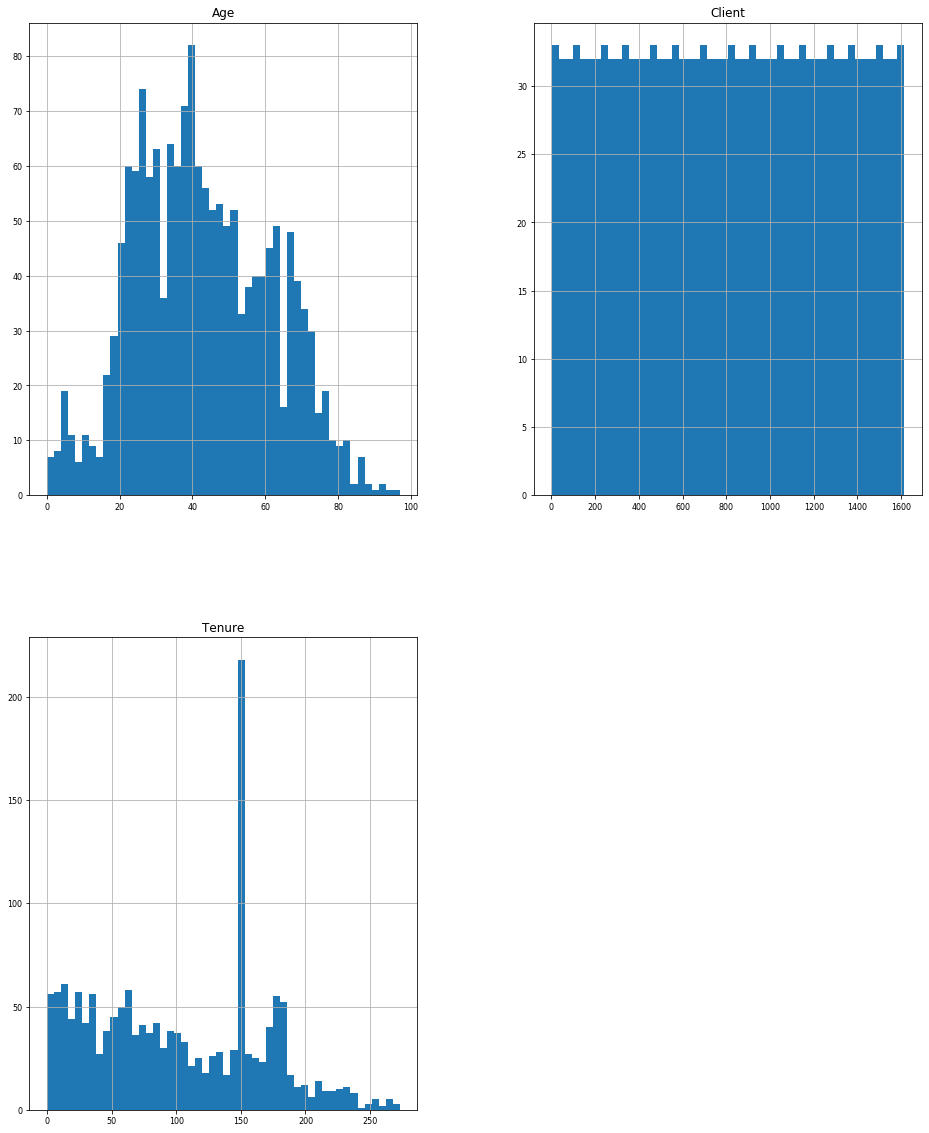

In [50]:
df2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

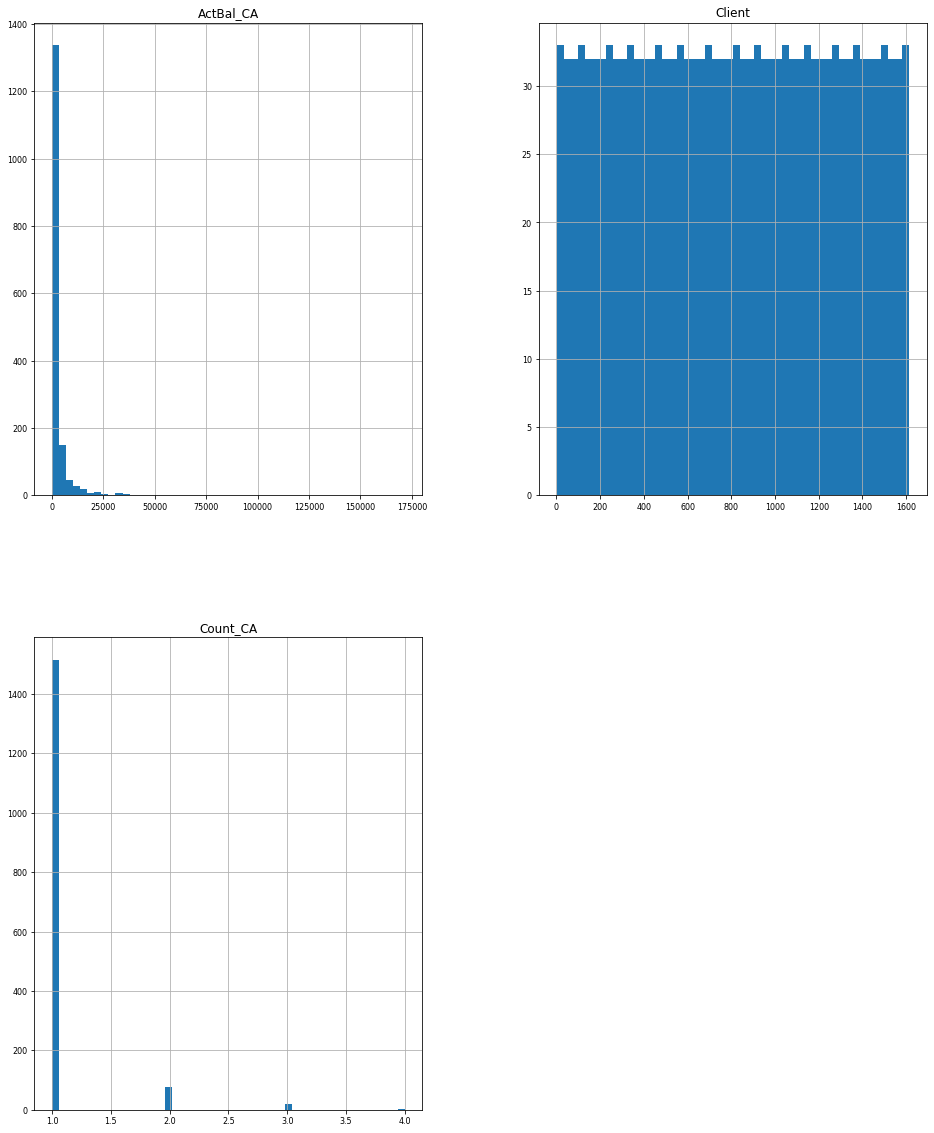

In [56]:
df3new.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

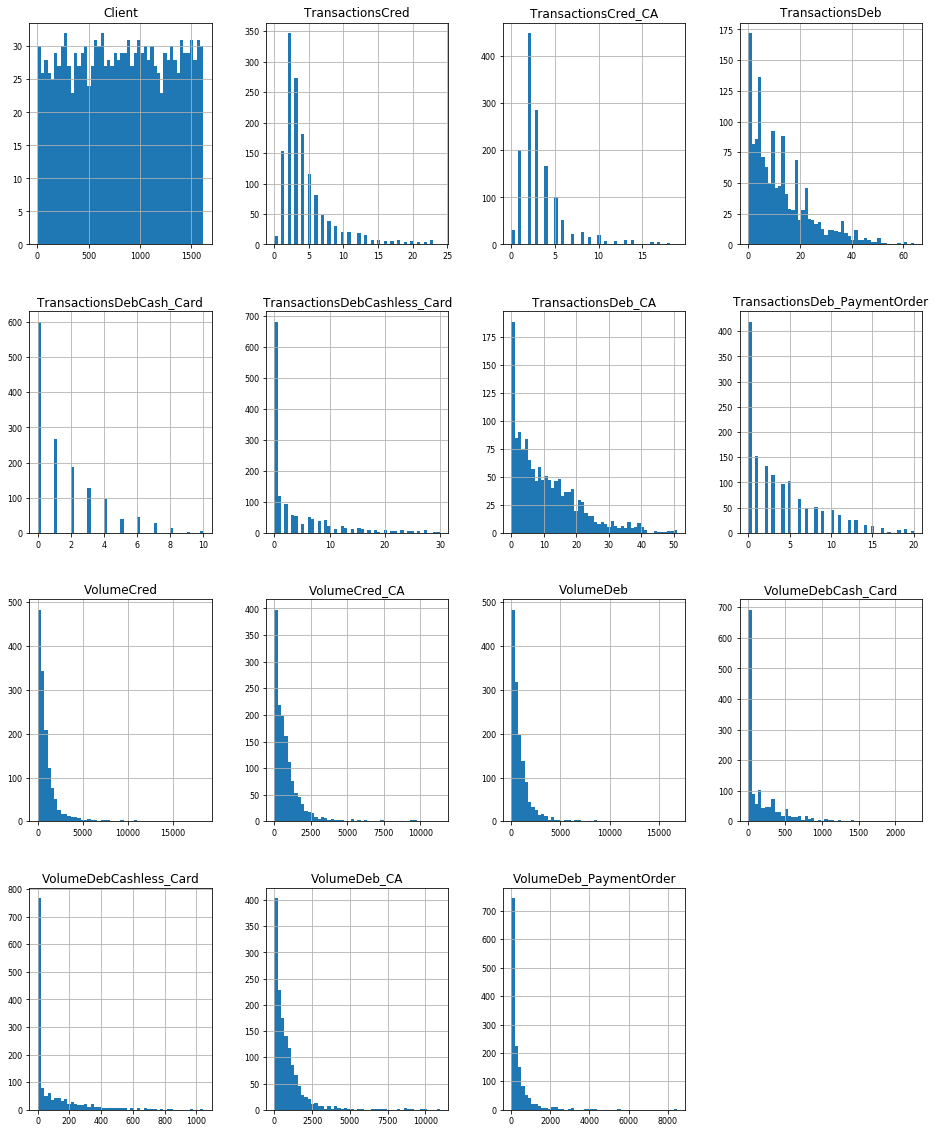

In [53]:
df4no.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

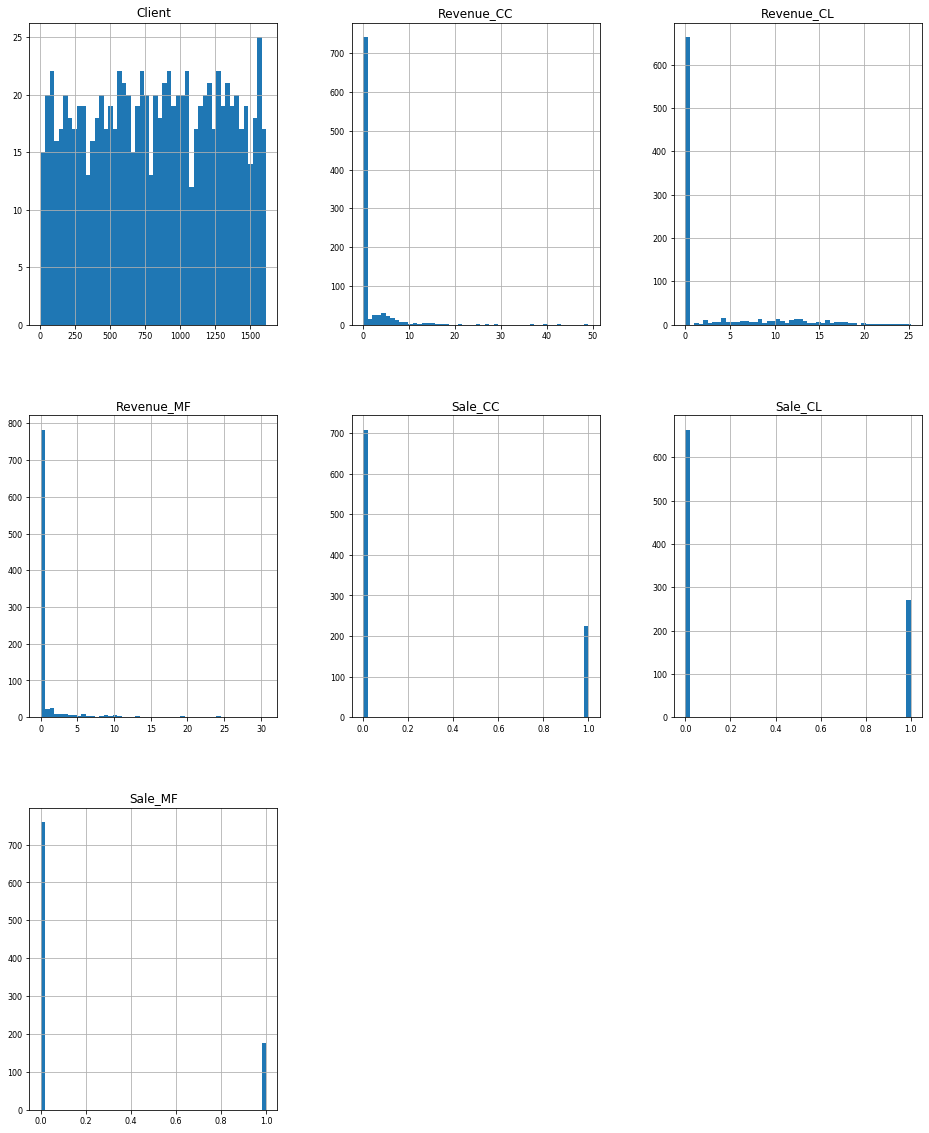

In [54]:
df5no.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Aplicamos Modelos de ML para predecir el Revenue, decidimos usar Revenue CL ya que es el que mejor resultados da

In [119]:
X = df5no.drop(['Revenue_CL'], axis=1)
y = df5no['Revenue_CL']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=66)

In [121]:
clf_rf = RandomForestRegressor(n_estimators=30)
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


###### Random Forest ######
Score : 0.5756
[0.54448191 0.72681371 0.61392504 0.72572629 0.6836787 ]

MSE    : 13.12 
MAE    : 1.50 
RMSE   : 3.62 
R2     : 0.58 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [122]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


####### Linear Regression #######
Score : 0.7357
[0.66035319 0.71290073 0.71466717 0.76217102 0.7458111 ]

MSE    : 8.17 
MAE    : 1.28 
RMSE   : 2.86 
R2     : 0.74 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [123]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


###### AdaBoost Regression ######
Score : 0.7319
[0.66523813 0.72595143 0.68470492 0.75999347 0.73250629]

MSE    : 8.28 
MAE    : 1.22 
RMSE   : 2.88 
R2     : 0.73 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [124]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

      Iter       Train Loss   Remaining Time 
         1          28.5595            0.11s
         2          24.8599            0.08s
         3          21.8632            0.07s
         4          19.4359            0.06s
         5          17.4698            0.05s
         6          15.8772            0.05s
         7          14.5872            0.06s
         8          13.5424            0.05s
         9          12.6960            0.05s
        10          12.0105            0.05s
        20           9.4432            0.03s
        30           9.1311            0.03s
        40           9.0689            0.02s
        50           9.0233            0.02s
        60           8.9859            0.02s
        70           8.9548            0.01s
        80           8.9286            0.01s
        90           8.9052            0.00s
       100           8.8843            0.00s
      Iter       Train Loss   Remaining Time 
         1          29.5413            0.06s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [144]:
df5c = df5.drop(columns=['Client'])

Despues de analizar varios modelos de Machine Learning decidimos que el mas util seria AdaBoost Regression, por lo cual aremos las predicciones del Revenue CL usando este modelo

In [145]:
y_pred=clf_ar.predict(df5c)
y_pred

array([ 0.        , 12.50921687,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 10.35645982,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 10.35645982,
        0.        ,  0.        , 10.35645982,  0.        ,  0.        ,
       12.50921687,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       10.35645982,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 10.35645982,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

Creamos un Data Frame con las predicciones de nuestro nuevo modelo

In [147]:
clp=df5.copy()
clp['CL_Pred']=y_pred
clp.head()

,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,CL_Pred
0,1094,0,1,0,0.000000,5.138571,0.0000,0.000000
1,1484,1,0,1,25.609107,0.000000,8.7225,12.509217
2,20,0,1,0,0.000000,3.822500,0.0000,0.000000
3,1193,0,0,0,0.000000,0.000000,0.0000,0.000000
4,142,0,0,0,0.000000,0.000000,0.0000,0.000000


Creamos un Plot para ver que efectivamente nuestro predict se acerca un al modelo original

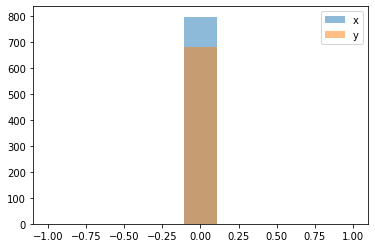

In [148]:
x = [clp.CL_Pred]
y = [clp.Revenue_CL]

bins = np.linspace(-1, 1, 10)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

Revisamos las graficas por separado del nuevo Dataframe ya con nuestro Predict

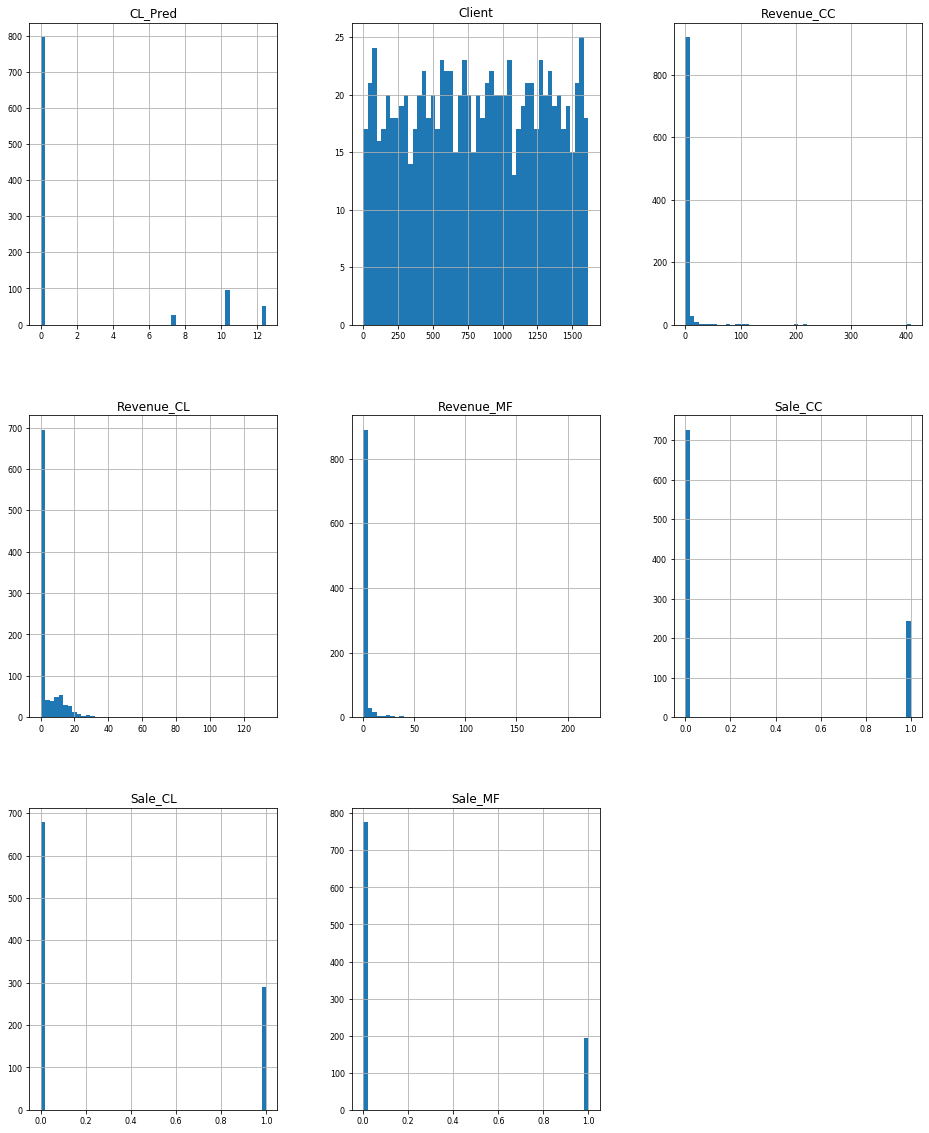

In [149]:
clp.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);